## Domain

This is an introductory data set considered the "hello world" of data science. It is an ongoing competition on Kaggle allowing students of data science to prepare a model and make a submission to a competition while they are still learning the subject. 

## Problem

This is a binary classification problem in which the challenge is to predict whether a passenger survived the sinking of the Titanic given the demographic data of the passengers. Here, the task $T$ is a binary classification and the experience $E$ is the list of passengers and their survival outcome. 

Note `read.table` and `read.csv` are equivalent accept for the default args. `read.table` defaults to separating on white space. `read.csv` defaults to separating on commas.

## Solution

To solve this problem, we will generate a vector of integers using filtering and masking.

## Data

The following analysis shows:

- there are 891 rows and 10 useful variable columns in the dataset. One of these columns is the target `Survived`. An 11th and 12th column are a unique id for each passenger and the name of each passenger, respectively, and have no predictive power.
- there are four integer value columns:
   - `Survived`
   - `Pclass`
   - `SibSp`
   - `Parch`
- there are two numerical value columns:
   - `Age`
   - `Fare`
- there are five factor columns:
   - `Sex`
   - `Ticket`
   - `Cabin`
   - `Embarked`
- The following are the summary statistics of the data:

   ```
      Survived          Pclass          Sex           Age            SibSp      
    Min.   :0.0000   Min.   :1.000   female:314   Min.   : 0.42   Min.   :0.000  
    1st Qu.:0.0000   1st Qu.:2.000   male  :577   1st Qu.:20.12   1st Qu.:0.000  
    Median :0.0000   Median :3.000                Median :28.00   Median :0.000  
    Mean   :0.3838   Mean   :2.309                Mean   :29.70   Mean   :0.523  
    3rd Qu.:1.0000   3rd Qu.:3.000                3rd Qu.:38.00   3rd Qu.:1.000  
    Max.   :1.0000   Max.   :3.000                Max.   :80.00   Max.   :8.000  
                                                  NA's   :177                    
        Parch             Ticket         Fare                Cabin     Embarked
    Min.   :0.0000   1601    :  7   Min.   :  0.00              :687    :  2   
    1st Qu.:0.0000   347082  :  7   1st Qu.:  7.91   B96 B98    :  4   C:168   
    Median :0.0000   CA. 2343:  7   Median : 14.45   C23 C25 C27:  4   Q: 77   
    Mean   :0.3816   3101295 :  6   Mean   : 32.20   G6         :  4   S:644   
    3rd Qu.:0.0000   347088  :  6   3rd Qu.: 31.00   C22 C26    :  3           
    Max.   :6.0000   CA 2144 :  6   Max.   :512.33   D          :  3           
                     (Other) :852                    (Other)    :186   
   ```                     

In [1]:
titanic <- read.table('train.csv', sep=",", header = T)

In [2]:
dim(titanic)

[1] 891  12

In [3]:
str(titanic)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


### `PassengerId` and `Name` are Completely Unique

In [4]:
length(unique(titanic$PassengerId)); length(unique(titanic$Name))

[1] 891

[1] 891

In [5]:
rownames(titanic) <- titanic$PassengerId
titanic$PassengerId <- NULL
titanic$Name <- NULL

In [6]:
summary(titanic)

    Survived          Pclass          Sex           Age            SibSp      
 Min.   :0.0000   Min.   :1.000   female:314   Min.   : 0.42   Min.   :0.000  
 1st Qu.:0.0000   1st Qu.:2.000   male  :577   1st Qu.:20.12   1st Qu.:0.000  
 Median :0.0000   Median :3.000                Median :28.00   Median :0.000  
 Mean   :0.3838   Mean   :2.309                Mean   :29.70   Mean   :0.523  
 3rd Qu.:1.0000   3rd Qu.:3.000                3rd Qu.:38.00   3rd Qu.:1.000  
 Max.   :1.0000   Max.   :3.000                Max.   :80.00   Max.   :8.000  
                                               NA's   :177                    
     Parch             Ticket         Fare                Cabin     Embarked
 Min.   :0.0000   1601    :  7   Min.   :  0.00              :687    :  2   
 1st Qu.:0.0000   347082  :  7   1st Qu.:  7.91   B96 B98    :  4   C:168   
 Median :0.0000   CA. 2343:  7   Median : 14.45   C23 C25 C27:  4   Q: 77   
 Mean   :0.3816   3101295 :  6   Mean   : 32.20   G6        

### Target: `Survived`

The target class, `Survived`, is unevenly distributed.

In [7]:
table(titanic$Survived)


  0   1 
549 342 

In [8]:
prop.table(table(titanic$Survived))


        0         1 
0.6161616 0.3838384 

In [9]:
library(repr)
options(repr.plot.width=20, repr.plot.height=4)

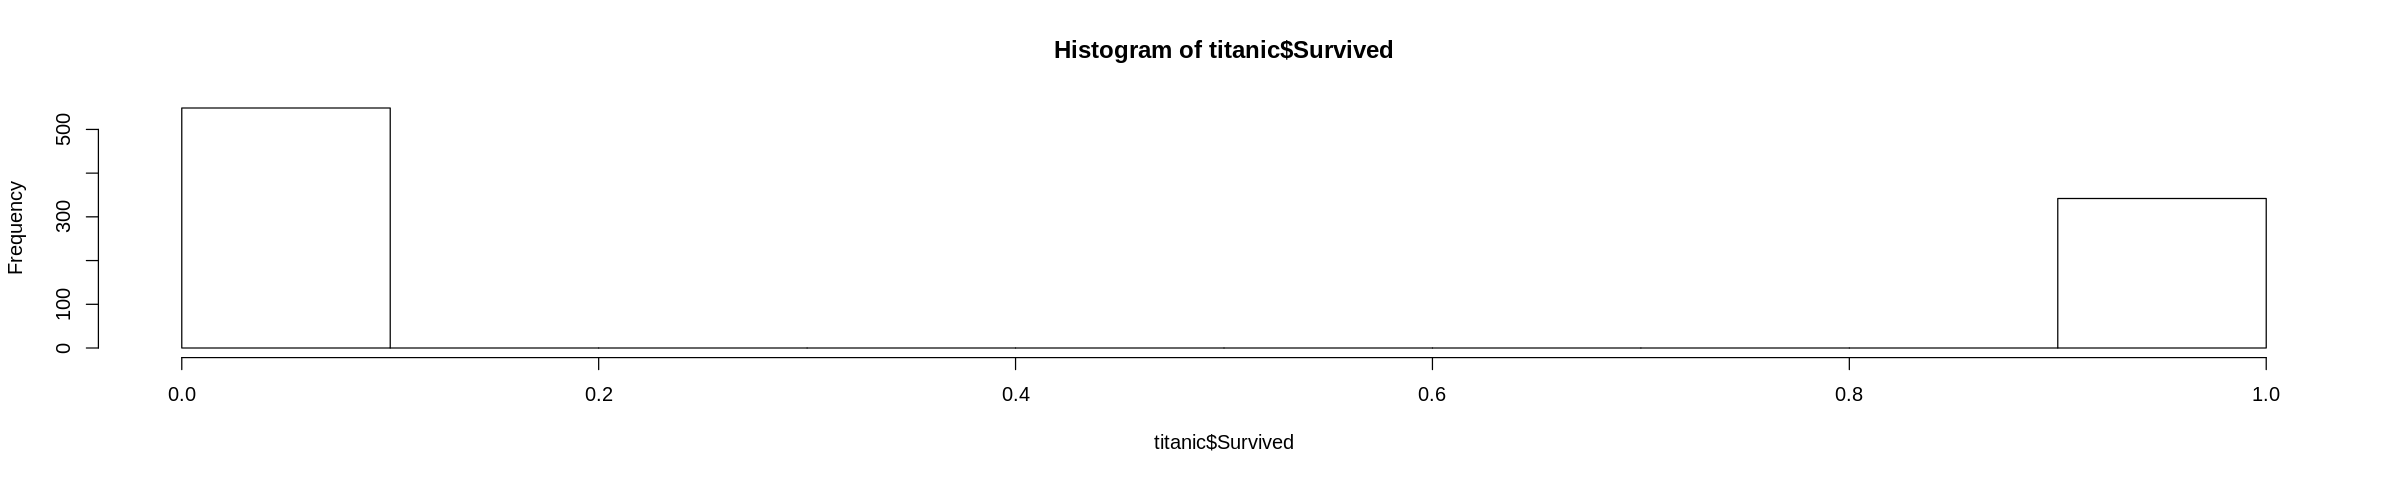

In [10]:
hist(titanic$Survived)

## Benchmark

We will use a naive guess based on the most common class as a benchmark. 61.6% of passengers did not survive. We will guess for our benchmark that there were no survivors.

In [11]:
no_survivors <- titanic$Survived
no_survivors <- rep(0, length(titanic$Survived))

## Metrics

As this is an beginning exercise, we will use the accuracy.

In [12]:
verify_length <- function (v1, v2 ){
    if (length(v1) != length(v2)) {
        stop('length of vectors do not match') 
    }
}

accuracy <- function (actual, predicted) {
    verify_length(actual, predicted)
    return(sum(actual == predicted)/length(actual))
}

In [13]:
accuracy(titanic$Survived, no_survivors)

[1] 0.6161616